# SVM on Iris Dataset

Below are various forms of SVM on the Iris dataset. The first is Linear SVM, followed by Polynomial SVM, then Gaussian SVM.

In [18]:
import numpy as np
from sklearn import datasets 
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
from matplotlib import pyplot as plt


iris_dataset = datasets.load_iris()           # Import iris data to model Svm classifier

X = iris_dataset['data']                      # X is the data
Y = iris_dataset['target']                    # Y is the labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)      # 30% of data to test on

### PCA of Iris Dataset

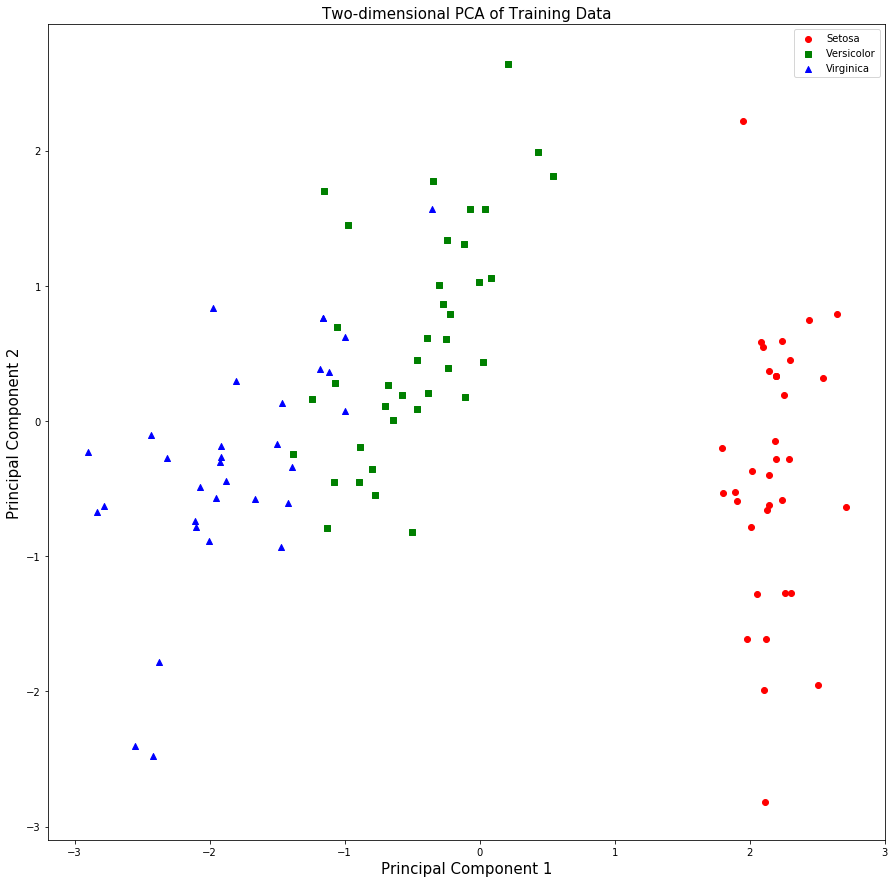

In [19]:
# Computation of the mean of training data
X_train_T = X_train.T
mean_vec = X_train_T.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X_train_T.shape[0],1),[1,X_train_T.shape[1]])

# Centered training data matrix
train_centered_X = X_train_T - mean_mat

# Normalize training data matrix
standard_deviation = np.array([[np.std(i)] for i in train_centered_X])
train_normal_X = train_centered_X/standard_deviation

# Compute two-dimensional PCA features of the centered and normalized dataset
U, s, Vh = np.linalg.svd(train_normal_X)    # Singular value decomposition 

# Matrix of the top two principal components of the centered, normalized training data matrix
U_2 = U[:,0:2]

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_train = U_2.T@train_normal_X

# Scatter plot of training data using the two-dimensional PCA features
plt.figure(figsize=(15,15))
setosa = plt.scatter(X_tilde_train.T[np.where(Y_train==0),0],
                     X_tilde_train.T[np.where(Y_train==0),1],c='r',marker='o')
versicolor = plt.scatter(X_tilde_train.T[np.where(Y_train==1),0],
                         X_tilde_train.T[np.where(Y_train==1),1],c='g',marker='s')
virginica = plt.scatter(X_tilde_train.T[np.where(Y_train==2),0],
                        X_tilde_train.T[np.where(Y_train==2),1],c='b',marker='^')
plt.legend((setosa, versicolor, virginica), ("Setosa", "Versicolor", "Virginica"))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA of Training Data", fontsize = 15)
plt.show()


# Computation of the mean of test data
X_test_T = X_test.T
mean_mat = np.tile(mean_vec.reshape(X_test_T.shape[0],1),[1,X_test_T.shape[1]])

# Centered test data matrix
test_centered_X = X_test_T - mean_mat

# Normalize test data matrix
standard_deviation = np.array([[np.std(i)] for i in test_centered_X])
test_normal_X = test_centered_X/standard_deviation

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_test = U_2.T@test_normal_X

In [20]:
def PlotTrainingData(X_tilde_train_T):
    # Scatter plot for training digits '0', '1', and '2' using the 2D PCA features
    plt.figure(figsize=(15,15))
    setosa = plt.scatter(X_tilde_train_T[np.where(Y_train==0),0], X_tilde_train_T[np.where(Y_train==0),1],c='r',marker='o')
    versicolor = plt.scatter(X_tilde_train_T[np.where(Y_train==1),0],X_tilde_train_T[np.where(Y_train==1),1],c='g',marker='o')
    virginica = plt.scatter(X_tilde_train_T[np.where(Y_train==2),0],X_tilde_train_T[np.where(Y_train==2),1],c='b',marker='o')
    plt.xlabel("Principal Component 1", fontsize = 15)
    plt.ylabel("Principal Component 2", fontsize = 15)
    plt.title("Two-dimensional PCA", fontsize = 15)

### Linear SVM of Iris Dataset

test     [2 2 0 0 0 0 2 1 2 0 1 2 2 2 2 0 0 1 2 2 2 2 1 2 0 0 2 0 2 0 2 2 1 0 1 0 1
 0 1 1 1 0 2 1 1]
predict [[2 2 0 0 0 0 2 1 2 0 1 2 2 2 2 0 0 2 2 2 2 1 1 2 0 0 2 0 1 0 2 2 1 0 1 0
  1 0 1 1 1 0 2 2 1]]
acc  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True False  True  True  True False  True  True
   True  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True False  True]]
----------------------------------------------------------
[[15  0  0]
 [ 0 10  2]
 [ 0  2 16]]
----------------------------------------------------------


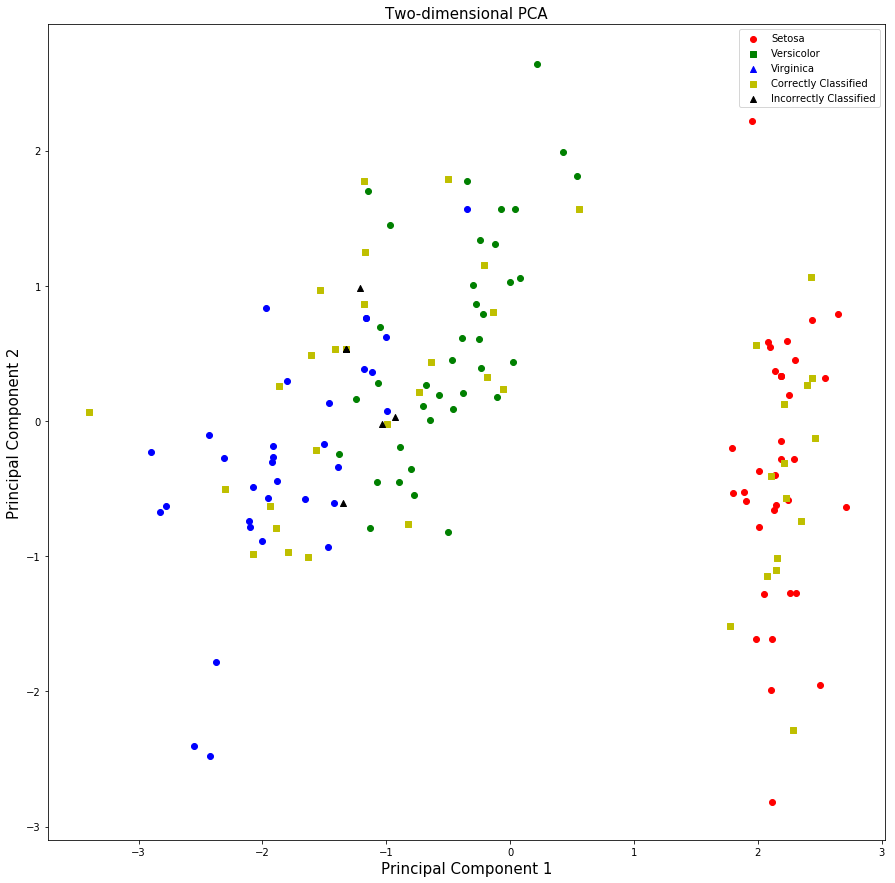

In [21]:
def LinearSVM(X_train, Y_train, X_test, Y_test):
    """
    Linear SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'linear')                   # Linear SVM
    svclassifier.fit(X_tilde_train.T, Y_train)              # Fit the data
    Y_pred_Linear = svclassifier.predict(X_tilde_test.T)    # Make predictions on test data
    return Y_pred_Linear


# Run Linear classifier
LinearSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Linear classifier predictions
Y_pred_Linear = np.array([LinearSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label1 = np.equal(Y_pred_Linear,Y_test)
print("test    ", Y_test)
print("predict", Y_pred_Linear)
print("acc ", acc_label1)


print("----------------------------------------------------------")
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing1 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing1))
print("----------------------------------------------------------")



# Plot training data
PlotTrainingData(X_tilde_train.T)

# Plot for test data
correct = plt.scatter(X_tilde_test.T[np.where(acc_label1==True),0],X_tilde_test.T[np.where(acc_label1==True),1],c='y',marker='s')
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label1==False),0],X_tilde_test.T[np.where(acc_label1==False),1],c='k',marker='^')
plt.legend((setosa, versicolor, virginica, correct, incorrect), 
               ("Setosa", "Versicolor", "Virginica", "Correctly Classified", "Incorrectly Classified"))
plt.show()


### Polynomial SVM on Iris Dataset

test            [2 2 0 0 0 0 2 1 2 0 1 2 2 2 2 0 0 1 2 2 2 2 1 2 0 0 2 0 2 0 2 2 1 0 1 0 1
 0 1 1 1 0 2 1 1]
predict ploy   [[2 2 0 0 0 0 2 1 2 0 1 2 2 2 2 0 0 2 2 2 2 1 1 2 0 0 2 0 1 0 2 2 1 0 1 0
  1 0 1 1 1 0 1 2 1]]
predict linear [[2 2 0 0 0 0 2 1 2 0 1 2 2 2 2 0 0 2 2 2 2 1 1 2 0 0 2 0 1 0 2 2 1 0 1 0
  1 0 1 1 1 0 2 2 1]]
acc  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True False  True  True  True False  True  True
   True  True  True  True False  True  True  True  True  True  True  True
   True  True  True  True  True  True False False  True]]
----------------------------------------------------------
[[15  0  0]
 [ 0 10  2]
 [ 0  3 15]]
----------------------------------------------------------


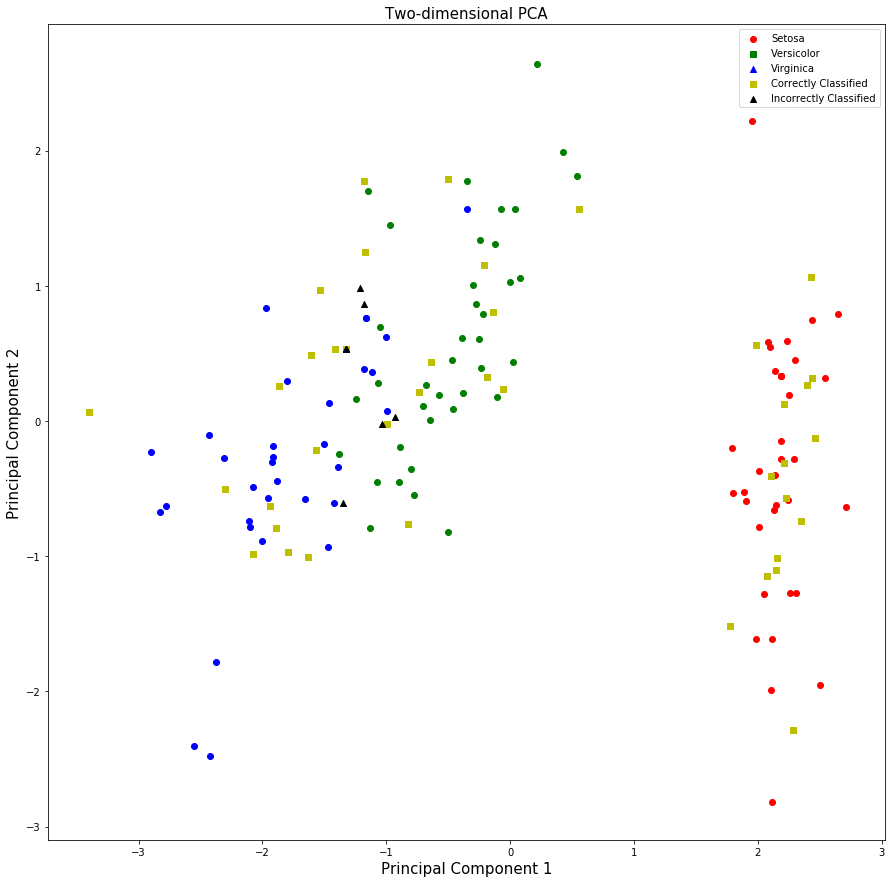

In [22]:
def PolySVM(X_train, Y_train, X_test, Y_test):
    """
    Poly SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'poly', degree = 1)       # Polynomial SVM - degree 1
    svclassifier.fit(X_tilde_train.T, Y_train)            # Fit the data
    Y_pred_Poly = svclassifier.predict(X_tilde_test.T)    # Make predictions on test data
    return Y_pred_Poly


# Run Linear classifier
PolySVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Linear classifier predictions
Y_pred_Poly = np.array([PolySVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label2 = np.equal(Y_pred_Poly,Y_test)
print("test           ", Y_test)
print("predict ploy  ", Y_pred_Poly)
print("predict linear", Y_pred_Linear)
print("acc ", acc_label2)


print("----------------------------------------------------------")
svclassifier = SVC(kernel = 'poly', degree = 1)
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing2 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing2))
print("----------------------------------------------------------")



# Plot training data
PlotTrainingData(X_tilde_train.T)

# Plot for test data
correct = plt.scatter(X_tilde_test.T[np.where(acc_label2==True),0],X_tilde_test.T[np.where(acc_label2==True),1],c='y',marker='s')
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label2==False),0],X_tilde_test.T[np.where(acc_label2==False),1],c='k',marker='^')
plt.legend((setosa, versicolor, virginica, correct, incorrect), 
               ("Setosa", "Versicolor", "Virginica", "Correctly Classified", "Incorrectly Classified"))
plt.show()



### Gaussian SVM on Iris Dataset

test         [0 0 2 0 0 2 1 0 2 1 2 1 2 2 2 1 0 1 1 2 0 1 1 1 0 0 0 0 1 2 1 0 0 1 2 1 1
 2 0 2 2 0 2 0 2]
gaussian    [[0 0 2 0 0 2 1 0 2 1 2 1 2 2 2 1 0 1 1 2 0 1 1 1 0 0 0 0 1 2 1 0 0 1 2 1
  1 2 0 2 2 0 1 0 2]]
linear      [[0 0 2 0 0 2 1 0 2 1 2 1 2 2 2 1 0 1 1 2 0 1 1 1 0 0 0 0 1 2 1 0 0 1 2 1
  1 2 0 2 2 0 1 0 2]]
acc [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True False  True  True]]
----------------------------------------------------------
[[16  0  0]
 [ 0 14  0]
 [ 0  1 14]]
----------------------------------------------------------


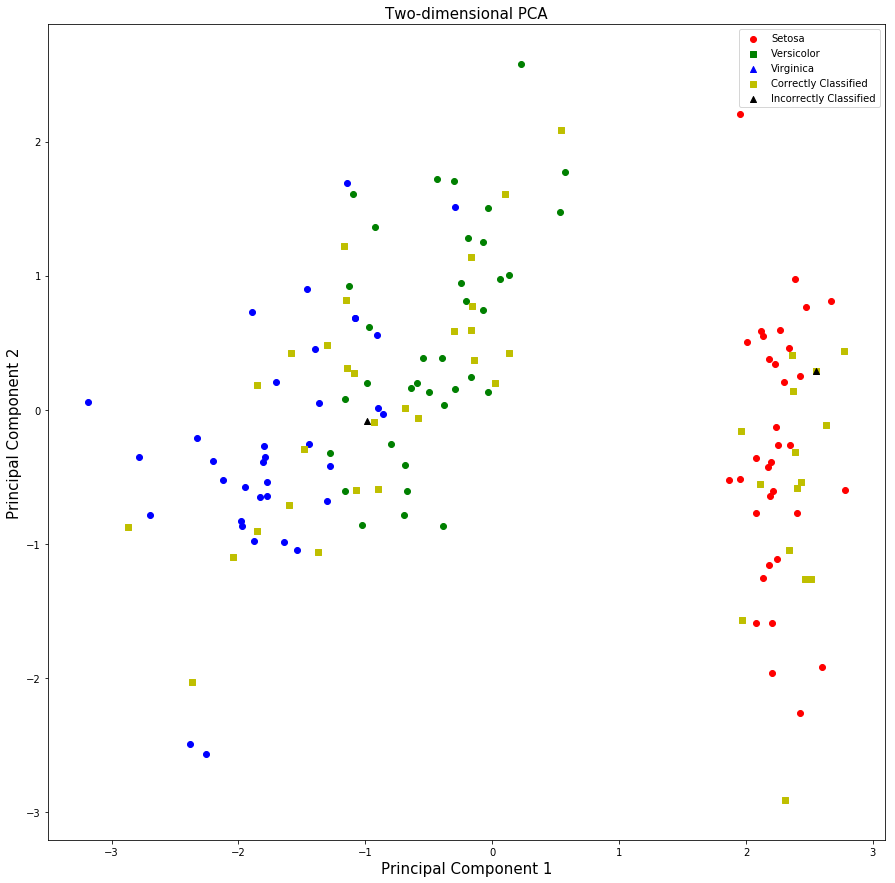

x [[ 2.55484257]
 [-0.98759446]]
y [[ 0.28706009]
 [-0.08630113]]


In [14]:
def GaussianSVM(X_train, Y_train, X_test, Y_test):
    """
    Gaussian SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'rbf')                # Gaussian SVM
    svclassifier.fit(X_train, Y_train)                # Fit the data
    Y_pred_Gaussian = svclassifier.predict(X_test)    # Make predictions on test data
    return Y_pred_Gaussian
    
# Run Gaussian classifier
GaussianSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Gaussian classifier predictions
Y_pred_Gaussian = np.array([GaussianSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label3 = np.equal(Y_pred_Gaussian,Y_test)
print("test        ", Y_test)
print("gaussian   ", Y_pred_Gaussian)
#print("poly       ", Y_pred_Poly)
print("linear     ", Y_pred_Linear)
print("acc", acc_label3)

print("----------------------------------------------------------")
svclassifier = SVC(kernel = 'rbf')
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing3 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing3))
print("----------------------------------------------------------")



# Plot training data
PlotTrainingData(X_tilde_train.T)

# Plot for test data
correct = plt.scatter(X_tilde_test.T[np.where(acc_label3==True),0],X_tilde_test.T[np.where(acc_label3==True),1],c='y',marker='s')
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label3==False),0],X_tilde_test.T[np.where(acc_label3==False),1],c='k',marker='^')
plt.legend((setosa, versicolor, virginica, correct, incorrect), 
               ("Setosa", "Versicolor", "Virginica", "Correctly Classified", "Incorrectly Classified"))
plt.show()

print("x", X_tilde_test.T[np.where(acc_label3==False),0])
print("y", X_tilde_test.T[np.where(acc_label3==False),1])

### Discussion of various types of SVM

The Setosa samples are linearly separable from from the Versicolor and the Virginica samples. Because of this linear separation, the Setosa are perfectly classified with linear, Gaussian, and polynomial SVM. Linear SVM is the best choice for classifying Setosa from Versicolor and Virginica because linear SVM is the faster and easiest classification, computationally wise.

The Versicolor and the Virginica samples are not linearly separable so they cannot be perfectly classified using linear SVM. Linear SVM is favored above Gaussian and polynomial SVM when the number of features is large. The reason for this is because if the number of features is large, Gaussian and polynomial SVM aren't significantly more accurate than linear SVM so the computational cost doesn't justify choosing Gaussian or polynomial over linear SVM. 

But in this example, there are only 2 principle component directions or features. So it is computationally worth using Gaussian and polynomial SVM instead of linear SVM. As seen above, Gaussian and polynomial SVM have slightly less classification errors than linear SVM.

# SVM on NBA Player Stats

### Importing NBA Player Stats Dataset

In [ ]:
import numpy as np
from sklearn import datasets 
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix  
from matplotlib import pyplot as plt
import csv
import math

with open('/Users/Michaela/Desktop/players_stats.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')
    
    count = -1
    number = []; playerNames = []; positions = []; points = [];
    fgPCT = [];  threePCT = [];    fthPCT = [];    totalReb = [];  assist = [];
    steals = []; blocks = [];      turnover = [];  offReb = [];    asstTO = [];
    labels = []
    
    for row in readCSV:
        count += 1
        number.append(count)
        playerNames.append(row[0])
        positions.append(row[30])
        points.append(row[3])
        fgPCT.append(row[6])
        threePCT.append(row[9])
        fthPCT.append(row[12])
        offReb.append(row[13])
        totalReb.append(row[15])
        assist.append(row[16])
        steals.append(row[17])
        blocks.append(row[18])
        turnover.append(row[19])
        asstTO.append(row[22])
        
        if(row[30] == 'PG'):
            labels.append(1)
        if(row[30] == 'SG'):
            labels.append(2)
        if(row[30] == 'SF'):
            labels.append(3)
        if(row[30] == 'PF'):
            labels.append(4)
        if(row[30] == 'C'):
            labels.append(5)    

                
numA = np.column_stack(number)
namesA = np.column_stack(playerNames)
posA = np.column_stack(positions)
pointsA = np.column_stack(points)
fgA = np.column_stack(fgPCT)
threeA = np.column_stack(threePCT)
freeA = np.column_stack(fthPCT)
rebA = np.column_stack(totalReb)
assistA = np.column_stack(assist)
stealA = np.column_stack(steals)
blockA = np.column_stack(blocks)
turnA = np.column_stack(turnover)
offRA = np.column_stack(offReb)
atoA = np.column_stack(asstTO)

statsNames = np.array(list(zip(numA, namesA, posA, pointsA, fgA, threeA, freeA, rebA, assistA, stealA, blockA, turnA)))
statsN = statsNames[0, :,:]

statsNoNames = np.array(list(zip(fgA, atoA, threeA, freeA, rebA, pointsA, assistA, stealA, blockA, turnA, offRA)))
stats = statsNoNames[0, :,:]

data = stats.T[1:,:]
names = playerNames[1:]
pos = positions[1:]
dataSet = data.astype(np.float)


### PCA and Plot of NBA Dataset

In [ ]:
length_train = (int)(490*0.9)
length_test = (int)(490*0.1)

X_train = dataSet[0:length_train,:]
Y_train = labels[0:length_train]
X_test = dataSet[length_train:,:]
Y_test = labels[length_train:]


# Computation of the mean of training data
X_train_T = X_train.T
mean_vec = X_train_T.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(11,1), (1,length_train))

# Centered training data matrix
train_centered_X = X_train_T - mean_mat

# Normalize training data matrix
standard_deviation = np.array([[np.std(i)] for i in train_centered_X])
train_normal_X = train_centered_X/standard_deviation

# Compute two-dimensional PCA features of the centered and normalized dataset
U, s, Vh = np.linalg.svd(train_normal_X)    # Singular value decomposition 

# Matrix of the top two principal components of the centered, normalized training data matrix
U_2 = U[:,0:2]

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_train = U_2.T@train_normal_X

# Scatter plot of training data using the two-dimensional PCA features
plt.figure(figsize=(15,15))


oneX = list();   oneY = list();
twoX = list();   twoY = list();
threeX = list(); threeY = list();
fourX =  list(); fourY = list();
fiveX = list();  fiveY = list();

for i in range(len(X_train)):
    if(labels[i] == 1):
        oneX.append(X_tilde_train.T[i][0])
        oneY.append(X_tilde_train.T[i][1])
    if(labels[i] == 2):
        twoX.append(X_tilde_train.T[i][0])
        twoY.append(X_tilde_train.T[i][1])
    if(labels[i] == 3):
        threeX.append(X_tilde_train.T[i][0])
        threeY.append(X_tilde_train.T[i][1])
    if(labels[i] == 4):
        fourX.append(X_tilde_train.T[i][0])
        fourY.append(X_tilde_train.T[i][1])
    if(labels[i] == 5):
        fiveX.append(X_tilde_train.T[i][0])
        fiveY.append(X_tilde_train.T[i][1])
            

PG = plt.scatter(oneX, oneY, c='m', marker='o', label = 'PG')
SG = plt.scatter(twoX, twoY, c='k',marker='s', label = 'SG')
SF = plt.scatter(threeX, threeY, c='b',marker='^', label = 'SF')
PF = plt.scatter(fourX, fourY, c='y',marker='D', label = 'PF')
C  = plt.scatter(fiveX, fiveY, c='c',marker='s', label = 'C')
plt.legend(handles = [PG, SG, SF, PF, C])
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA of Training Data", fontsize = 15)
plt.show()


# Computation of the mean of test data
X_test_T = X_test.T
#mean_mat = np.tile(mean_vec.reshape(X_test_T.shape[0],1),[1,X_test_T.shape[1]])
mean_mat = np.tile(mean_vec.reshape(11,1), (1,length_test))

# Centered test data matrix
test_centered_X = X_test_T - mean_mat

# Normalize test data matrix
standard_deviation = np.array([[np.std(i)] for i in test_centered_X])
test_normal_X = test_centered_X/standard_deviation

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_test = U_2.T@test_normal_X

### Linear SVM of NBA Dataset

In [ ]:
def LinearSVM(X_train, Y_train, X_test, Y_test):
    """
    Linear SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'linear')                   # Linear SVM
    svclassifier.fit(X_tilde_train.T, Y_train)              # Fit the data
    Y_pred_Linear = svclassifier.predict(X_tilde_test.T)    # Make predictions on test data
    return Y_pred_Linear


# Run Linear classifier
LinearSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Linear classifier predictions
Y_pred_Linear = np.array([LinearSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label1 = np.equal(Y_pred_Linear,Y_test)

print("Confusion Matrix of Linear SVM")
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing1 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing1))


# Plot training data
plt.figure(figsize=(15,15))
oneX = list();   oneY = list();
twoX = list();   twoY = list();
threeX = list(); threeY = list();
fourX =  list(); fourY = list();
fiveX = list();  fiveY = list();

for i in range(len(X_train)):
    if(labels[i] == 1):
        oneX.append(X_tilde_train.T[i][0])
        oneY.append(X_tilde_train.T[i][1])
    if(labels[i] == 2):
        twoX.append(X_tilde_train.T[i][0])
        twoY.append(X_tilde_train.T[i][1])
    if(labels[i] == 3):
        threeX.append(X_tilde_train.T[i][0])
        threeY.append(X_tilde_train.T[i][1])
    if(labels[i] == 4):
        fourX.append(X_tilde_train.T[i][0])
        fourY.append(X_tilde_train.T[i][1])
    if(labels[i] == 5):
        fiveX.append(X_tilde_train.T[i][0])
        fiveY.append(X_tilde_train.T[i][1])


PG = plt.scatter(oneX, oneY, c='m', marker='o', s = 50, alpha = 0.5)
SG = plt.scatter(twoX, twoY, c='k',marker='s', s = 50, alpha = 0.5)
SF = plt.scatter(threeX, threeY, c='b',marker='^', s = 50, alpha = 0.5)
PF = plt.scatter(fourX, fourY, c='y',marker='D', s = 50, alpha = 0.5)
C  = plt.scatter(fiveX, fiveY, c='c',marker='s', s = 50, alpha = 0.5)
correct = plt.scatter(X_tilde_test.T[np.where(acc_label1==True),0],X_tilde_test.T[np.where(acc_label1==True),1],c='g',marker='o', linewidths=3.5, s=100)
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label1==False),0],X_tilde_test.T[np.where(acc_label1==False),1],c='r',marker='o', linewidths=3.5, s = 100)
plt.legend((PG, SG, SF, PF, C, correct, incorrect),("PG", "SG", "SF", "PF", "C", "Classified Correctly", "Incorrectly Classified"))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA", fontsize = 15)
plt.show()


### Polynomial SVM of NBA Dataset

In [ ]:
def PolySVM(X_train, Y_train, X_test, Y_test):
    """
    Poly SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'poly', degree = 1)       # Polynomial SVM - degree 1
    svclassifier.fit(X_tilde_train.T, Y_train)            # Fit the data
    Y_pred_Poly = svclassifier.predict(X_tilde_test.T)    # Make predictions on test data
    return Y_pred_Poly


# Run Linear classifier
PolySVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Linear classifier predictions
Y_pred_Poly = np.array([PolySVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label2 = np.equal(Y_pred_Poly,Y_test)

print("Confusion Matrix of Linear SVM")
svclassifier = SVC(kernel = 'poly', degree = 1)
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing1 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing1))


# Plot training data
plt.figure(figsize=(15,15))
oneX = list();   oneY = list();
twoX = list();   twoY = list();
threeX = list(); threeY = list();
fourX =  list(); fourY = list();
fiveX = list();  fiveY = list();

for i in range(len(X_train)):
    if(labels[i] == 1):
        oneX.append(X_tilde_train.T[i][0])
        oneY.append(X_tilde_train.T[i][1])
    if(labels[i] == 2):
        twoX.append(X_tilde_train.T[i][0])
        twoY.append(X_tilde_train.T[i][1])
    if(labels[i] == 3):
        threeX.append(X_tilde_train.T[i][0])
        threeY.append(X_tilde_train.T[i][1])
    if(labels[i] == 4):
        fourX.append(X_tilde_train.T[i][0])
        fourY.append(X_tilde_train.T[i][1])
    if(labels[i] == 5):
        fiveX.append(X_tilde_train.T[i][0])
        fiveY.append(X_tilde_train.T[i][1])


PG = plt.scatter(oneX, oneY, c='m', marker='o', s = 50, alpha = 0.5)
SG = plt.scatter(twoX, twoY, c='k',marker='s', s = 50, alpha = 0.5)
SF = plt.scatter(threeX, threeY, c='b',marker='^', s = 50, alpha = 0.5)
PF = plt.scatter(fourX, fourY, c='y',marker='D', s = 50, alpha = 0.5)
C  = plt.scatter(fiveX, fiveY, c='c',marker='s', s = 50, alpha = 0.5)
correct = plt.scatter(X_tilde_test.T[np.where(acc_label2==True),0],X_tilde_test.T[np.where(acc_label2==True),1],c='g',marker='o', linewidths=3.5, s=100)
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label2==False),0],X_tilde_test.T[np.where(acc_label2==False),1],c='r',marker='o', linewidths=3.5, s = 100)
plt.legend((PG, SG, SF, PF, C, correct, incorrect),("PG", "SG", "SF", "PF", "C", "Classified Correctly", "Incorrectly Classified"))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA", fontsize = 15)
plt.show()



### Gaussian SVM on NBA Data

In [ ]:
def GaussianSVM(X_train, Y_train, X_test, Y_test):
    """
    Gaussian SVM classifier that returns either label "0", "1", or "2"
    Inputs:
        X_train: Training data matrix
        Y_train: Labels of training data matrix
        X_test: Test data matrix
        Y_test: Labels of test data matrix
    Outputs: 
        Y_pred: Predicted label of test data matrix
    """
    svclassifier = SVC(kernel = 'rbf')                # Gaussian SVM
    svclassifier.fit(X_train, Y_train)                # Fit the data
    Y_pred_Gaussian = svclassifier.predict(X_test)    # Make predictions on test data
    return Y_pred_Gaussian
    
# Run Gaussian classifier
GaussianSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)    

# Save Gaussian classifier predictions
Y_pred_Gaussian = np.array([GaussianSVM(X_tilde_train.T, Y_train, X_tilde_test.T, Y_test)])

# Accuracy of the predicted labels
acc_label3 = np.equal(Y_pred_Gaussian,Y_test)

print("Confusion Matrix of Linear SVM")
svclassifier = SVC(kernel = 'rbf')
svclassifier.fit(X_tilde_train.T, Y_train)
Y_pred_testing1 = svclassifier.predict(X_tilde_test.T)
print(confusion_matrix(Y_test, Y_pred_testing1))


# Plot training data
plt.figure(figsize=(15,15))
oneX = list();   oneY = list();
twoX = list();   twoY = list();
threeX = list(); threeY = list();
fourX =  list(); fourY = list();
fiveX = list();  fiveY = list();

for i in range(len(X_train)):
    if(labels[i] == 1):
        oneX.append(X_tilde_train.T[i][0])
        oneY.append(X_tilde_train.T[i][1])
    if(labels[i] == 2):
        twoX.append(X_tilde_train.T[i][0])
        twoY.append(X_tilde_train.T[i][1])
    if(labels[i] == 3):
        threeX.append(X_tilde_train.T[i][0])
        threeY.append(X_tilde_train.T[i][1])
    if(labels[i] == 4):
        fourX.append(X_tilde_train.T[i][0])
        fourY.append(X_tilde_train.T[i][1])
    if(labels[i] == 5):
        fiveX.append(X_tilde_train.T[i][0])
        fiveY.append(X_tilde_train.T[i][1])


PG = plt.scatter(oneX, oneY, c='m', marker='o', s = 50, alpha = 0.5)
SG = plt.scatter(twoX, twoY, c='k',marker='s', s = 50, alpha = 0.5)
SF = plt.scatter(threeX, threeY, c='b',marker='^', s = 50, alpha = 0.5)
PF = plt.scatter(fourX, fourY, c='y',marker='D', s = 50, alpha = 0.5)
C  = plt.scatter(fiveX, fiveY, c='c',marker='s', s = 50, alpha = 0.5)
correct = plt.scatter(X_tilde_test.T[np.where(acc_label3==True),0],X_tilde_test.T[np.where(acc_label3==True),1],c='g',marker='o', linewidths=3.5, s=100)
incorrect = plt.scatter(X_tilde_test.T[np.where(acc_label3==False),0],X_tilde_test.T[np.where(acc_label3==False),1],c='r',marker='o', linewidths=3.5, s = 100)
plt.legend((PG, SG, SF, PF, C, correct, incorrect),("PG", "SG", "SF", "PF", "C", "Classified Correctly", "Incorrectly Classified"))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA", fontsize = 15)
plt.show()

### Discussion on NBA SVM

As stated above, linear SVM is a wise choice on datasets with a large number of features. I performed 2D PCA on the NBA dataset. Because I limited the number of features to only 2, it is computationally worth using polynomial or Gaussian SVM on this dataset. 

For linear, polynomial, and Gaussian SVM, each had about 60% correct results. This low accuracy rate could be a result of several things. First, several NBA players can play multiple positions, but all players in the dataset were only given 1 position. So a tall power forward could be label as just a power forward, but in games he could actually be playing the center position. Another reason for misclassification is outliers. Superstars are outliers because they are usually very well rounded. A superstar point guard will probably have more blocks and rebounds than average point guards which skews the superstars data. Another type of outlier is a player who doesn't play many minutes in games. These players might only play for a couple minutes and therefore can have skewed averages of statistics. 

In the graph of the normalized data, the outliers to the left of the plot represent players with statistics that vary a lot. These players are most likely players who don't play a lot of minutes so their averages aren't very accurate. The data points to the right of on the normalized graph most likely represent superstars because their statistical variance is very low, meaning they are well rounded players.

## Gaussian Mixture Model on Seed Data

### Import Seed Data

In [2]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix  
from matplotlib import pyplot as plt
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

with open('/Users/Michaela/Desktop/Seed_Data.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')
    area = []; parameter = []; compactness = []; length = []; width = [];  asymmetry = []; groove = [];   
    for row in readCSV:
        area.append(row[0])
        parameter.append(row[1])
        compactness.append(row[2])
        length.append(row[3])
        width.append(row[4])
        asymmetry.append(row[5])
        groove.append(row[6])
      
    
areaA = np.column_stack(area)
parameterA = np.column_stack(parameter)
compactnessA = np.column_stack(compactness)
lengthA = np.column_stack(length)
widthA = np.column_stack(width)
asymmetryA = np.column_stack(asymmetry)
grooveA = np.column_stack(groove)

data = np.array(list(zip(areaA, parameterA, compactnessA, lengthA, widthA, asymmetryA, grooveA)))                                 
dataN = data[0, :,1:]
dataSet = dataN.astype(np.float)

print(dataSet.shape)


(7, 210)


### PCA on Seed Data

(7, 168)
(7, 42)


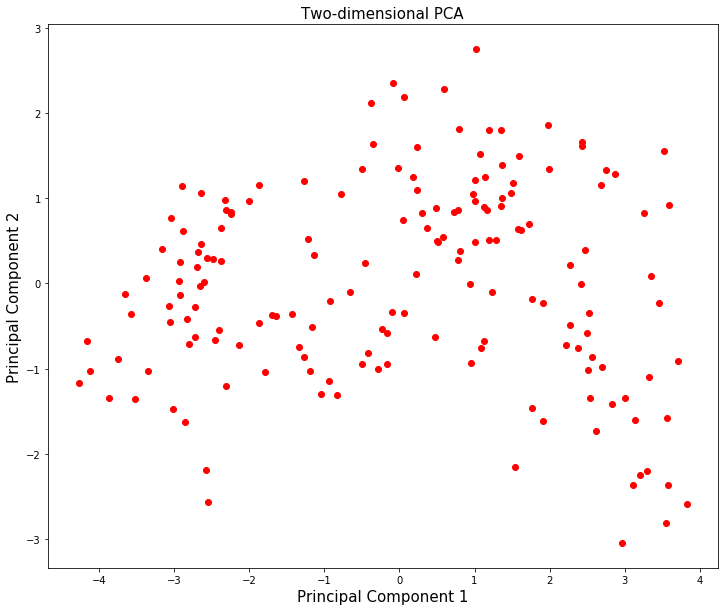

In [3]:
length_train = (int)(210*0.8)
length_test = (int)(210*0.2)


X_train = dataSet[:,0:length_train]
X_test = dataSet[:,length_train:]


print(X_train.shape)
print(X_test.shape)

# Computation of the mean of training data
mean_vec = X_train.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(7,1), (1,length_train))

# Centered training data matrix
train_centered_X = X_train - mean_mat

# Normalize training data matrix
standard_deviation = np.array([[np.std(i)] for i in train_centered_X])
train_normal_X = train_centered_X/standard_deviation

# Compute two-dimensional PCA features of the centered and normalized dataset
U, s, Vh = np.linalg.svd(train_normal_X)    # Singular value decomposition 

# Matrix of the top two principal components of the centered, normalized training data matrix
U_2 = U[:,0:2]

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_train = U_2.T@train_normal_X


def PlotTrainingDataSeed(X_tilde_train_T):
    plt.figure(figsize=(12,10))
    plt.scatter(X_tilde_train[0], X_tilde_train[1],c='r',marker='o')
    plt.xlabel("Principal Component 1", fontsize = 15)
    plt.ylabel("Principal Component 2", fontsize = 15)
    plt.title("Two-dimensional PCA", fontsize = 15)

PlotTrainingDataSeed(X_tilde_train)

# Computation of the mean of test data
mean_vec = X_test.mean(axis=1)
mean_mat = np.tile(mean_vec.reshape(7,1), (1,length_test))

# Centered test data matrix
test_centered_X = X_test - mean_mat

# Normalize test data matrix
standard_deviation = np.array([[np.std(i)] for i in test_centered_X])
test_normal_X = test_centered_X/standard_deviation

# PCA-based features of the centered, normalized data using the top-two principal components
X_tilde_test = U_2.T@test_normal_X

### Gaussian Mixture Model on Seed Data

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1
 2 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 2 1 2 2
 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


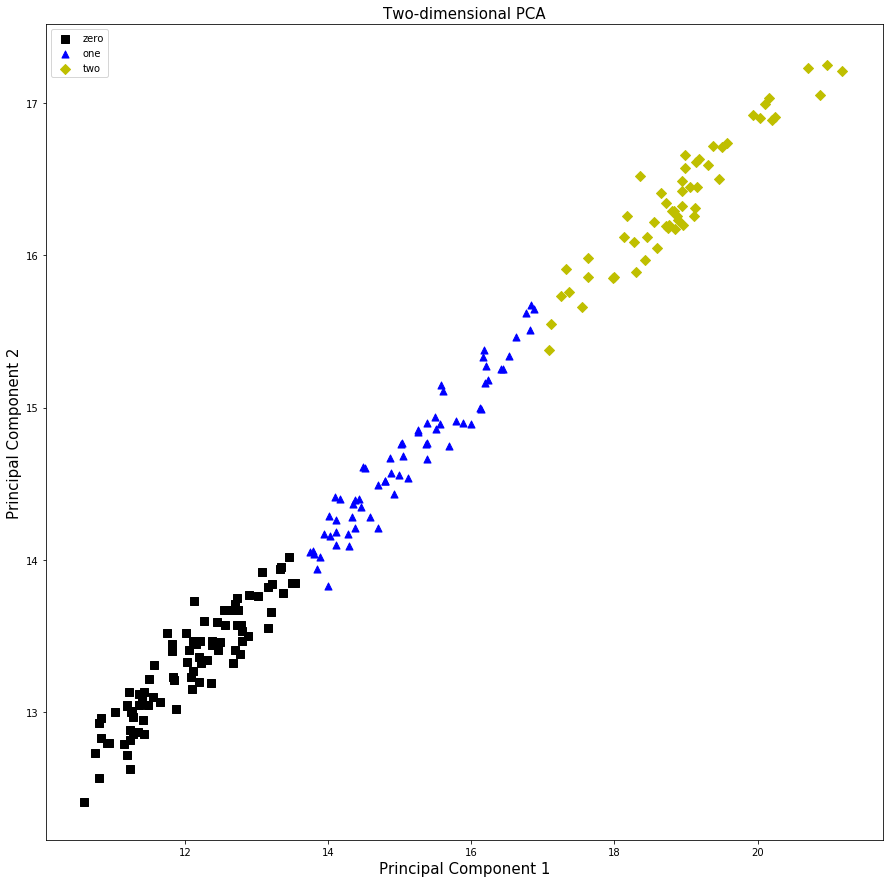

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from sklearn import mixture

# GMM fit data
gmm = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(dataSet.T)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(dataSet.T)

# Plot training data
plt.figure(figsize=(15,15))
zeroX = list(); zeroY = list();
oneX = list();   oneY = list();
twoX = list();   twoY = list();


for i in range(len(y_cluster_gmm)):
    if(y_cluster_gmm[i] == 0):
        zeroX.append(dataSet.T[i][0])
        zeroY.append(dataSet.T[i][1])
    if(y_cluster_gmm[i] == 1):
        oneX.append(dataSet.T[i][0])
        oneY.append(dataSet.T[i][1])
    if(y_cluster_gmm[i] == 2):
        twoX.append(dataSet.T[i][0])
        twoY.append(dataSet.T[i][1])

        
zero = plt.scatter(zeroX, zeroY, c='k',marker='s', s = 50)
one = plt.scatter(oneX, oneY, c='b',marker='^', s = 50)
two = plt.scatter(twoX, twoY, c='y',marker='D', s = 50)

plt.legend((zero, one, two),("zero", "one", "two"))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("Two-dimensional PCA", fontsize = 15)
plt.show()

